In [17]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor



In [18]:
RANDOM_SEED=42

In [19]:
df = pd.read_csv('../artifacts/data_clean/clean_dataset_completo.csv')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6109 entries, 0 to 6108
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   graphic card type       6109 non-null   int64  
 1   resolution (px)         6109 non-null   int64  
 2   CPU cores               6109 non-null   int64  
 3   RAM size                6109 non-null   float64
 4   operating system        6109 non-null   int64  
 5   drive type              6109 non-null   int64  
 6   RAM type                6109 non-null   int64  
 7   CPU clock speed (GHz)   6109 non-null   float64
 8   CPU model               6109 non-null   int64  
 9   drive memory size (GB)  6109 non-null   float64
 10  warranty                6109 non-null   int64  
 11  screen size             6109 non-null   int64  
 12  buynow_price            6109 non-null   float64
 13  gps                     6109 non-null   int64  
 14  nfc                     6109 non-null   

In [21]:
X = df.drop('buynow_price', axis=1) 
y = df['buynow_price'] 


In [22]:

X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)


In [23]:
modelo_regresion_lineal = LinearRegression()
modelo_regresion_lineal.fit(X_entrenamiento, y_entrenamiento)


LinearRegression()

In [24]:
predicciones_regresion_lineal = modelo_regresion_lineal.predict(X_prueba)


In [25]:
mse = mean_squared_error(y_prueba, predicciones_regresion_lineal)
mae = mean_absolute_error(y_prueba, predicciones_regresion_lineal)

r2 = r2_score(y_prueba, predicciones_regresion_lineal)

print("Error cuadrático medio (MSE):", mse)
print("Error absoluto medio (MAE):", mae)
print("Coeficiente de determinación (R²):", r2)


Error cuadrático medio (MSE): 582973.9749266998
Error absoluto medio (MAE): 527.7874218631043
Coeficiente de determinación (R²): 0.8004915498838965


In [26]:
modelo_random_forest=RandomForestRegressor(random_state=RANDOM_SEED) 
modelo_random_forest.fit(X_entrenamiento, y_entrenamiento)

RandomForestRegressor(random_state=42)

In [27]:
predicciones_random_forest = modelo_random_forest.predict(X_prueba)

In [28]:
mse = mean_squared_error(y_prueba, predicciones_random_forest)
mae = mean_absolute_error(y_prueba, predicciones_random_forest)
r2 = r2_score(y_prueba, predicciones_random_forest)
print("Error cuadrático medio (MSE):", mse)
print("Error absoluto medio (MAE):", mae)
print("Coeficiente de determinación (R²):", r2)

Error cuadrático medio (MSE): 187616.38622644203
Error absoluto medio (MAE): 245.33585377514362
Coeficiente de determinación (R²): 0.9357929237971075


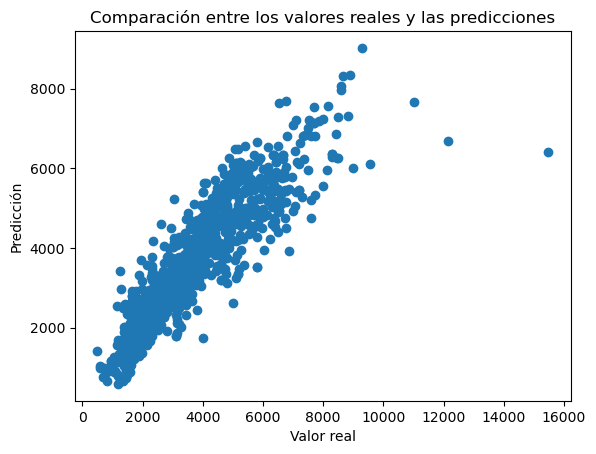

In [29]:
plt.scatter(y_prueba, predicciones_regresion_lineal)
plt.xlabel('Valor real')
plt.ylabel('Predicción')
plt.title('Comparación entre los valores reales y las predicciones')
plt.show()


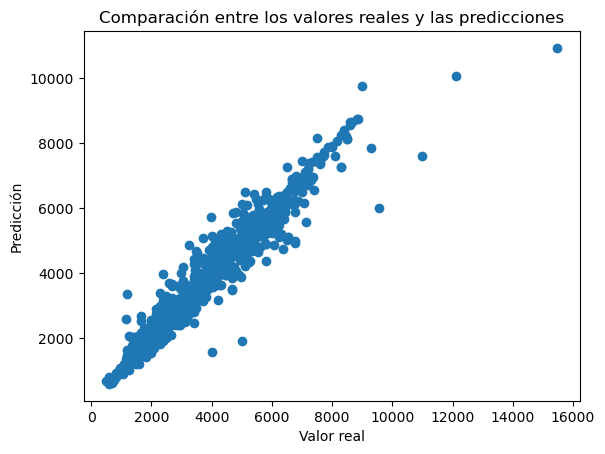

In [30]:
plt.scatter(y_prueba, predicciones_random_forest)
plt.xlabel('Valor real')
plt.ylabel('Predicción')
plt.title('Comparación entre los valores reales y las predicciones')
plt.show()
